<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Door-Scenario---Unidirectional-Flow" data-toc-modified-id="Door-Scenario---Unidirectional-Flow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Door Scenario - Unidirectional Flow</a></span></li><li><span><a href="#Bidirectional-Counter-Flow-Scenario" data-toc-modified-id="Bidirectional-Counter-Flow-Scenario-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bidirectional Counter Flow Scenario</a></span></li></ul></div>

In [2]:
import numpy as np

from matplotlib.patches import Ellipse

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import os
import networkx as nx

from border import Border
import constants as cs
from agent import Agent

from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


def norm(array):
    return np.sqrt(array[0]**2 + array[1]**2)

fontsize = 14
labelsize = 14
pad = 6
color = "mediumvioletred"
cmap = matplotlib.cm.get_cmap("viridis")

output_folder = "/home/maria/current/work/poli/masters_project/disser/figures/"


## Door Scenario - Unidirectional Flow

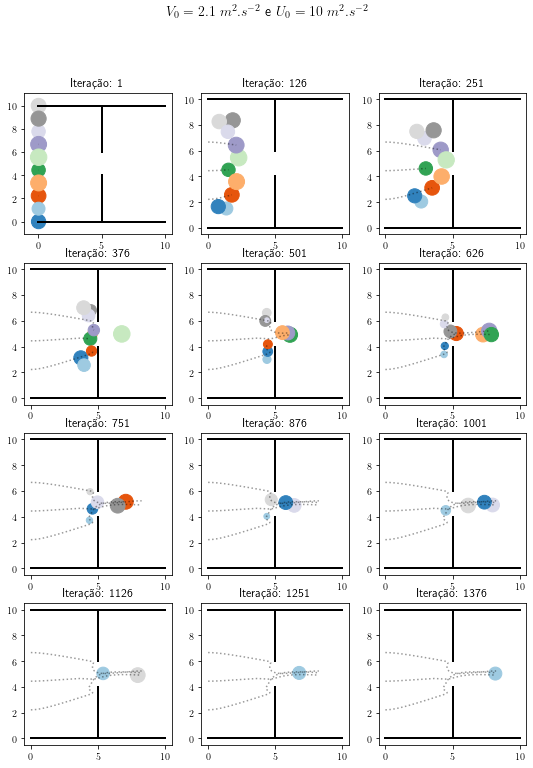

In [4]:
df = pd.read_csv("./log/1026/sim_S5000A10_V_ZERO2.1sc1/tracks.csv")

# Set number of instants (multiple of three):
n = 12
nrows = int(n/3)

# Get number of time steps:
M = len(df[df["agent_id"] == 0])
N = len(df[df["step"] == 0])

group_size = int(N/2)

step = int(M/n)

instax = np.arange(start = 1, stop = 1500, step = 125)


df["group"] = df["agent_id"].ge(group_size)

###################
# Create borders  
###################

cs.BORDERS = pd.read_csv("./borders.csv")

borders = []

for index, row in cs.BORDERS.iterrows(): 
    uid = index
            
    if row["shape"] == "line":
            
        x1 = row["x1"]
        y1 = row["y1"]
        x2 = row["x2"]
        y2 = row["y2"]
                
        Qx = np.linspace(start=x1, stop=x2, num=50)
        Qy = np.linspace(start=y1, stop=y2, num=50)

    borders.append(Border(uid, Qx, Qy))



fig = plt.figure(figsize = [9,12])

plt.suptitle(r"$V_{0} = 2.1$ $m^{2}.s^{-2}$ e $U_{0} = 10$ $m^{2}.s^{-2}$", fontsize = 14)

# Create plot grid:
gs = fig.add_gridspec(nrows, 3)
plots = []
count = 0

for i in range(0,nrows):
    row = []
    
    for j in range(0, 3):
        plot = fig.add_subplot(gs[i, j])
        row.append(plot)
        
        for border in borders:
            Q = np.array([border.Qx, border.Qy]).T
            plot.plot(Q[:,0], Q[:,1], linewidth = 2, linestyle = '-', color = "black")
        
        subset = df[df["step"] == instax[count]]
        plot.scatter(subset["position_x"], subset["position_y"], s = subset["velocity_mag"]*150, c=subset["agent_id"], cmap = "tab20c")
        plot.set_title("Iteração: " + str(instax[count]))
        
        subset = df[df["agent_id"] == 2]
        subset = subset[subset["step"] <= instax[count]]
        plot.plot(subset["position_x"], subset["position_y"], alpha = 0.4, color = "black", linestyle = "dotted")
        
        subset = df[df["agent_id"] == 4]
        subset = subset[subset["step"] <= instax[count]]
        plot.plot(subset["position_x"], subset["position_y"], alpha = 0.4, color = "black", linestyle = "dotted")
        
        subset = df[df["agent_id"] == 6]
        subset = subset[subset["step"] <= instax[count]]
        plot.plot(subset["position_x"], subset["position_y"], alpha = 0.4, color = "black", linestyle = "dotted")
        
        count = count + 1

    plots.append(row)
    

plt.savefig(output_folder + "door_scenario2.png", dpi = 300, bbox_inches = "tight")

## Bidirectional Counter Flow Scenario

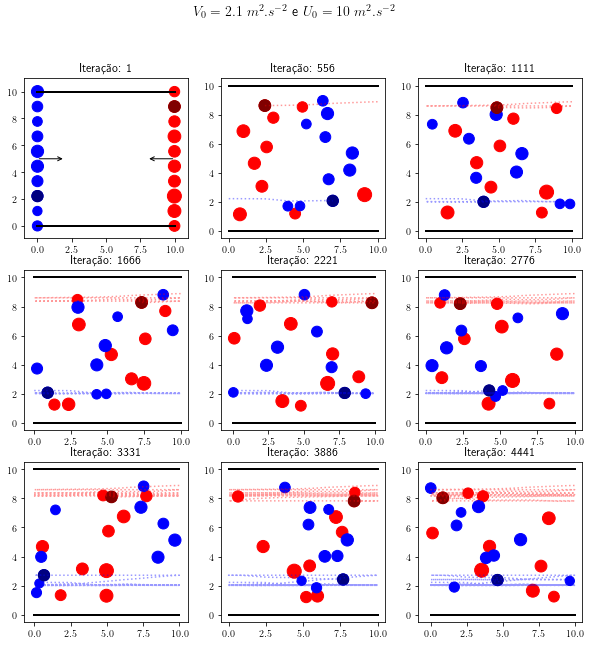

In [5]:
df = pd.read_csv("./log/1026/sim_S5000A20_V_ZERO2.1sc3/tracks.csv")
df = df[df.step != 0]

# Set number of instants (multiple of three):
n = 9
nrows = int(n/3)

# Get number of time steps:
M = len(df[df["agent_id"] == 0])
N = len(df[df["step"] == 1])

group_size = int(N/2)

step = int(M/n)

instax = np.arange(1, M-1, step)

df["group"] = df["agent_id"].ge(group_size)

###################
# Create borders  
###################

cs.BORDERS = pd.read_csv("./borders_simple.csv")

borders = []

for index, row in cs.BORDERS.iterrows(): 
    uid = index
            
    if row["shape"] == "line":
            
        x1 = row["x1"]
        y1 = row["y1"]
        x2 = row["x2"]
        y2 = row["y2"]
                
        Qx = np.linspace(start=x1, stop=x2, num=50)
        Qy = np.linspace(start=y1, stop=y2, num=50)

    borders.append(Border(uid, Qx, Qy))



fig = plt.figure(figsize = [10,10])

plt.suptitle(r"$V_{0} = 2.1$ $m^{2}.s^{-2}$ e $U_{0} = 10$ $m^{2}.s^{-2}$", fontsize = 14)
# Create plot grid:
gs = fig.add_gridspec(nrows, 3)
plots = []
count = 0

for i in range(0,nrows):
    row = []
    
    for j in range(0, 3):
        plot = fig.add_subplot(gs[i, j])
        row.append(plot)
        
        for border in borders:
            Q = np.array([border.Qx, border.Qy]).T
            plot.plot(Q[:,0], Q[:,1], linewidth = 2, linestyle = '-', color = "black")
        
        subset = df[df["group"] == True]
        subset = subset[subset["step"] == instax[count]]
        plot.scatter(subset["position_x"], subset["position_y"], s = subset["velocity_mag"]*100, c="red", cmap = "autumn")
        
        subset = df[df["group"] == False]
        subset = subset[subset["step"] == instax[count]]
        plot.scatter(subset["position_x"], subset["position_y"], s = subset["velocity_mag"]*100, c="blue", cmap = "winter")
        
        subset = df[df["agent_id"] == 2]
        plot.scatter(subset[subset["step"] == instax[count]].position_x, subset[subset["step"] == instax[count]].position_y, s = subset["velocity_mag"]*100, c = "navy")
        subset = subset[subset["step"] <= instax[count]]
        plot.plot(subset["position_x"], subset["position_y"], alpha = 0.4, color = "blue", linestyle = "dotted")
         
        subset = df[df["agent_id"] == 18]
        plot.scatter(subset[subset["step"] == instax[count]].position_x, subset[subset["step"] == instax[count]].position_y, s = subset["velocity_mag"]*100, c = "maroon")

        subset = subset[subset["step"] <= instax[count]]
        
        plot.plot(subset["position_x"], subset["position_y"], alpha = 0.4, color = "red", linestyle = "dotted")
        
        if count == 0:
            plot.annotate(r"",
                xy=(2, 5),      
                xytext=(0, 5), 
                xycoords='data',
                fontsize = 10,
                arrowprops=dict(arrowstyle = "->"),            
                horizontalalignment='center',
                verticalalignment='center',
                clip_on=True)  # clip to the axes bounding box


            plot.annotate(r"",
                xy=(8, 5),      
                xytext=(10, 5), 
                xycoords='data',
                fontsize = 10,
                arrowprops=dict(arrowstyle = "->"),            
                horizontalalignment='center',
                verticalalignment='center',
                clip_on=True)  # clip to the axes bounding box

        
        plot.set_title("Iteração: " + str(instax[count]))
        count = count + 1

    plots.append(row)
    

plt.savefig(output_folder + "counterflows2_lowres.png", dpi = 300, bbox_inches = "tight")


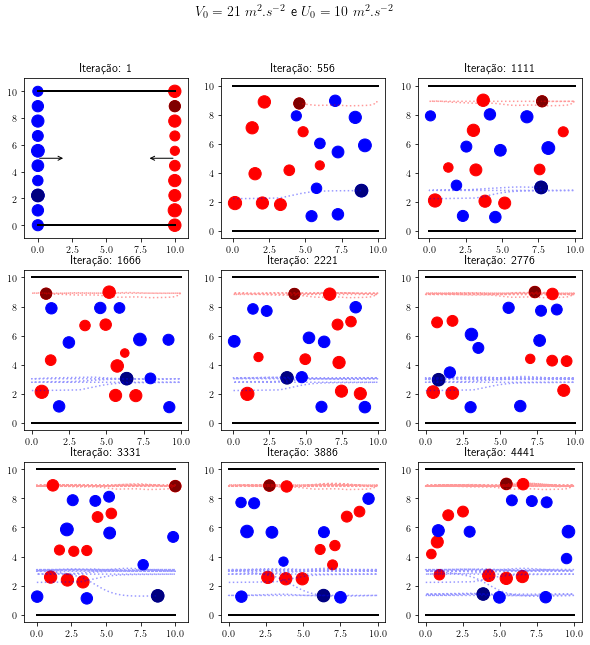

In [6]:
df = pd.read_csv("./log/1026/sim_S5000A20_V_ZERO21sc3/tracks.csv")
df = df[df.step != 0]

# Set number of instants (multiple of three):
n = 9
nrows = int(n/3)

# Get number of time steps:
M = len(df[df["agent_id"] == 0])
N = len(df[df["step"] == 1])

group_size = int(N/2)

step = int(M/n)

instax = np.arange(1, M-1, step)

df["group"] = df["agent_id"].ge(group_size)

###################
# Create borders  
###################

cs.BORDERS = pd.read_csv("./borders_simple.csv")

borders = []

for index, row in cs.BORDERS.iterrows(): 
    uid = index
            
    if row["shape"] == "line":
            
        x1 = row["x1"]
        
        y1 = row["y1"]
        x2 = row["x2"]
        y2 = row["y2"]
                
        Qx = np.linspace(start=x1, stop=x2, num=50)
        Qy = np.linspace(start=y1, stop=y2, num=50)

    borders.append(Border(uid, Qx, Qy))



fig = plt.figure(figsize = [10,10])

plt.suptitle(r"$V_{0} = 21$ $m^{2}.s^{-2}$ e $U_{0} = 10$ $m^{2}.s^{-2}$", fontsize = 14)
# Create plot grid:
gs = fig.add_gridspec(nrows, 3)
plots = []
count = 0

for i in range(0,nrows):
    row = []
    
    for j in range(0, 3):
        plot = fig.add_subplot(gs[i, j])
        row.append(plot)
        
        for border in borders:
            Q = np.array([border.Qx, border.Qy]).T
            plot.plot(Q[:,0], Q[:,1], linewidth = 2, linestyle = '-', color = "black")
        
        subset = df[df["group"] == True]
        subset = subset[subset["step"] == instax[count]]
        plot.scatter(subset["position_x"], subset["position_y"], s = subset["velocity_mag"]*100, c="red", cmap = "autumn")
        
        subset = df[df["group"] == False]
        subset = subset[subset["step"] == instax[count]]
        plot.scatter(subset["position_x"], subset["position_y"], s = subset["velocity_mag"]*100, c="blue", cmap = "winter")
        
        subset = df[df["agent_id"] == 2]
        plot.scatter(subset[subset["step"] == instax[count]].position_x, subset[subset["step"] == instax[count]].position_y, s = subset["velocity_mag"]*100, c = "navy")
        subset = subset[subset["step"] <= instax[count]]
        plot.plot(subset["position_x"], subset["position_y"], alpha = 0.4, color = "blue", linestyle = "dotted")
         
        subset = df[df["agent_id"] == 18]
        plot.scatter(subset[subset["step"] == instax[count]].position_x, subset[subset["step"] == instax[count]].position_y, s = subset["velocity_mag"]*100, c = "maroon")

        subset = subset[subset["step"] <= instax[count]]
        
        plot.plot(subset["position_x"], subset["position_y"], alpha = 0.4, color = "red", linestyle = "dotted")
        
        if count == 0:
            plot.annotate(r"",
                xy=(2, 5),      
                xytext=(0, 5), 
                xycoords='data',
                fontsize = 10,
                arrowprops=dict(arrowstyle = "->"),            
                horizontalalignment='center',
                verticalalignment='center',
                clip_on=True)  # clip to the axes bounding box


            plot.annotate(r"",
                xy=(8, 5),      
                xytext=(10, 5), 
                xycoords='data',
                fontsize = 10,
                arrowprops=dict(arrowstyle = "->"),            
                horizontalalignment='center',
                verticalalignment='center',
                clip_on=True)  # clip to the axes bounding box

        
        plot.set_title("Iteração: " + str(instax[count]))
        count = count + 1

    plots.append(row)
    

plt.savefig(output_folder + "counterflows21_lowres.png", dpi = 300, bbox_inches = "tight")
